In [1]:
import bsb.options
from bsb import Scaffold, parse_configuration_file

# bsb.options.verbosity = 3
config = parse_configuration_file("configurations/io_test.yaml", parser="yaml")

scaffold = Scaffold(config)
scaffold.compile(clear=True)


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.7.0
 Built: Jun  9 2025 18:10:12

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.


Jun 09 18:22:52 Install [Info]: 
    loaded module iomodule
[2025-06-09 18:22:52.643251 - BSB] JobStatus.RUNNING {root}.placement.io_layer_placement
[2025-06-09 18:22:52.651380 - BSB] JobStatus.SUCCESS {root}.placement.io_layer_placement
[2025-06-09 18:22:52.656634 - BSB] JobStatus.RUNNING {root}.connectivity.gap_io
[2025-06-09 18:22:52.670386 - BSB] JobStatus.SUCCESS {root}.connectivity.gap_io


In [2]:
storage = scaffold.storage

for cell_name, cell_type in scaffold.cell_types.items():
    ps = cell_type.get_placement_set() 
    pos = ps.load_positions()
    print(f"{len(pos)} {cell_name} placed")

5 io placed


In [3]:
cs = scaffold.get_connectivity_set("gap_io")
for pre_locs, post_locs in cs.load_connections():
    pre_cell_id = pre_locs[0]
    post_cell_id = post_locs[0]
    print(f"Cell id {pre_cell_id} connects to cell id {post_cell_id}\n")

Cell id 1 connects to cell id 2

Cell id 3 connects to cell id 3

Cell id 4 connects to cell id 3

Cell id 0 connects to cell id 4

Cell id 2 connects to cell id 4



In [4]:
results = scaffold.run_simulation("basal_activity")


Jun 09 18:22:52 Install [Info]: 
    loaded module iomodule
gap_io: 100%|██████████| 1/1 [00:00<00:00, 164.13it/s]


/home/niccolo/Projects/Neuro/.venv/lib/python3.10/site-packages/nest/lib/hl_api_helper.py:114: UserWarning:
Models is deprecated and will be removed in a future version of NEST.
Please use nest.node_models or nest.synapse_models instead!


In [5]:
from matplotlib import pylab as plt 


In [6]:
signals = results.analogsignals


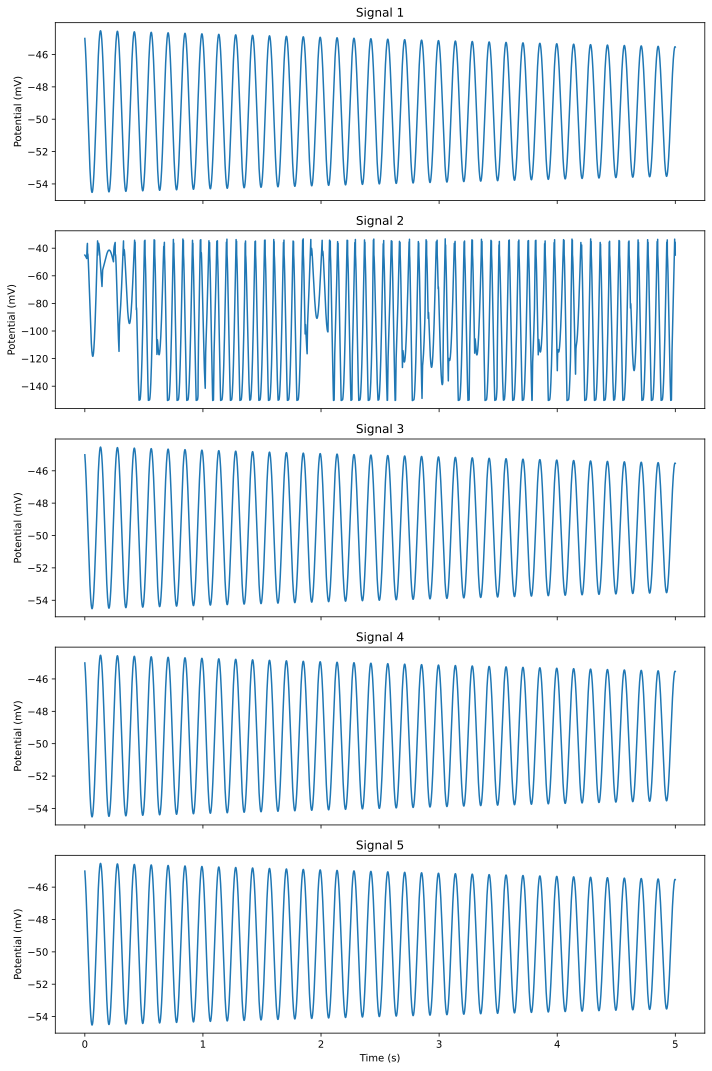

In [ ]:
# Create a figure with a subplot for each signal
fig, axes = plt.subplots(len(signals), 1, figsize=(10, 3*len(signals)), sharex=True)

# Handle the case where there's only one signal
if len(signals) == 1:
    axes = [axes]

# Plot each signal in its own subplot
for i, signal in enumerate(axes):
    axes[i].plot(signals[i].times, signals[i])
    axes[i].set_ylabel(f"Potential ({signals[i].units.dimensionality.string})")
    axes[i].set_title(f'Signal {i}')

# Set common x-label
plt.xlabel(f"Time ({signals[0].times.units.dimensionality.string})")
plt.tight_layout()

In [8]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.signal import welch
# from scipy.signal import find_peaks

# for vm_signal in signals:
#     sampling_rate = vm_signal.sampling_rate.rescale('Hz').magnitude
#     v_m = vm_signal.magnitude.flatten()

#     # Compute power spectral density
#     frequencies, power = welch(v_m, fs=sampling_rate, nperseg=2048)

#     # Focus on STO frequency range (1–10 Hz)
#     sto_band = (frequencies >= 1) & (frequencies <= 100)
#     sto_freq = frequencies[sto_band][np.argmax(power[sto_band])]

#     # Plot PSD
#     plt.semilogy(frequencies, power)
#     plt.axvline(sto_freq, color='r', linestyle='--', label=f'STO ~ {sto_freq:.2f} Hz')
#     plt.xlabel('Frequency (Hz)')
#     plt.ylabel('Power')
#     plt.title('Power Spectral Density (STO)')
#     plt.legend()
#     plt.show()

#     print(f"Estimated STO frequency: {sto_freq:.2f} Hz")


#     # Find peaks and troughs
#     peaks, _ = find_peaks(v_m)
#     troughs, _ = find_peaks(-v_m)

#     # Make sure we align peaks/troughs
#     min_len = min(len(peaks), len(troughs))
#     amplitudes = np.abs(v_m[peaks[:min_len]] - v_m[troughs[:min_len]])
#     mean_amp = np.mean(amplitudes)

#     print(f"Mean STO amplitude: {mean_amp:.2f} mV")

